<a href="https://colab.research.google.com/github/vibhuverma17/TS_ANALYSIS/blob/main/TS_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### CHARACTERISTICS OF TS DATA
- Cronological Order: Regular Interval
- Sequential Order: Sequenc of Data (some relation to the past)
- Temporal COmponents
  - Trend
  - Seasonality
  - Cycle
  - Noise
- Constant Frequency: Continuous Data, without any missing values
Dynamic Nature: Many external factors impact the TS data

TS analysis: Statistical techniques to extract meaningful insights regarding trends and patterns
- undestanding past behavious
- forecasting future

Time Series Decomposition/Components
- Trend: Long Term Direction
- Seasonality: Pattern that repeats at fixed intervals
- Cyclical: Pattern but not at fixed intervals
  - Economic Cycle
  - Business Cycle
- Noise/Residuals: Sudden random fluctuation in the data


Types of Decomposition:
What would give us the final results, adding or multiplying TS Components.
- Additive:
- Multiplicative

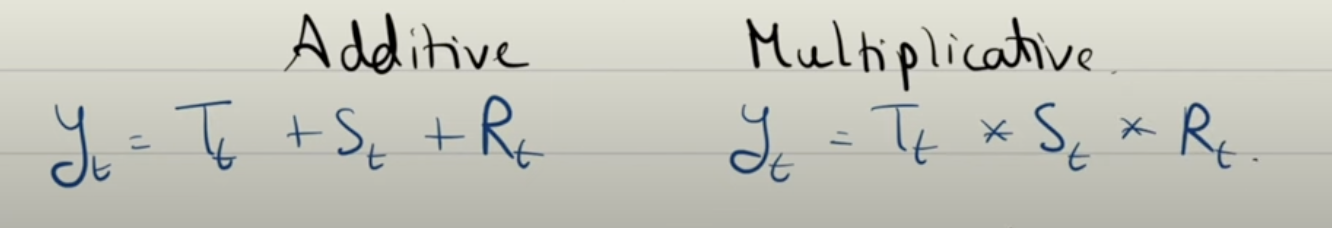

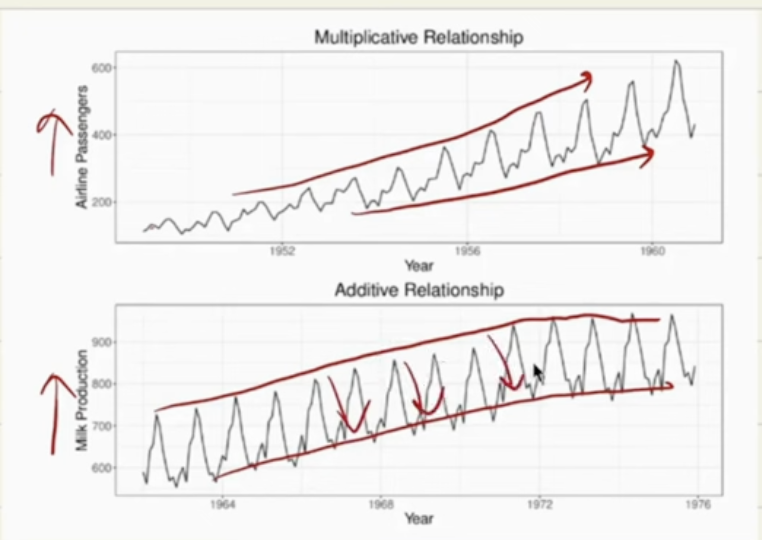

In [1]:
#!pip install yfinance matplotlib
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

# Download Apple stock data starting from 2024
data = yf.download("AAPL", start="2024-01-01")

# Print the first few rows of the data
data.head()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price            Close        High         Low        Open    Volume
Ticker            AAPL        AAPL        AAPL        AAPL      AAPL
Date                                                                
2024-01-02  184.532074  187.315366  182.792518  186.033057  82488700
2024-01-03  183.150375  184.770652  182.335262  183.120556  58414500
2024-01-04  180.824356  181.997307  179.800504  181.062914  71983600
2024-01-05  180.098709  181.669281  179.094742  180.903888  62303300
2024-01-08  184.452560  184.492330  180.416793  181.003268  59144500

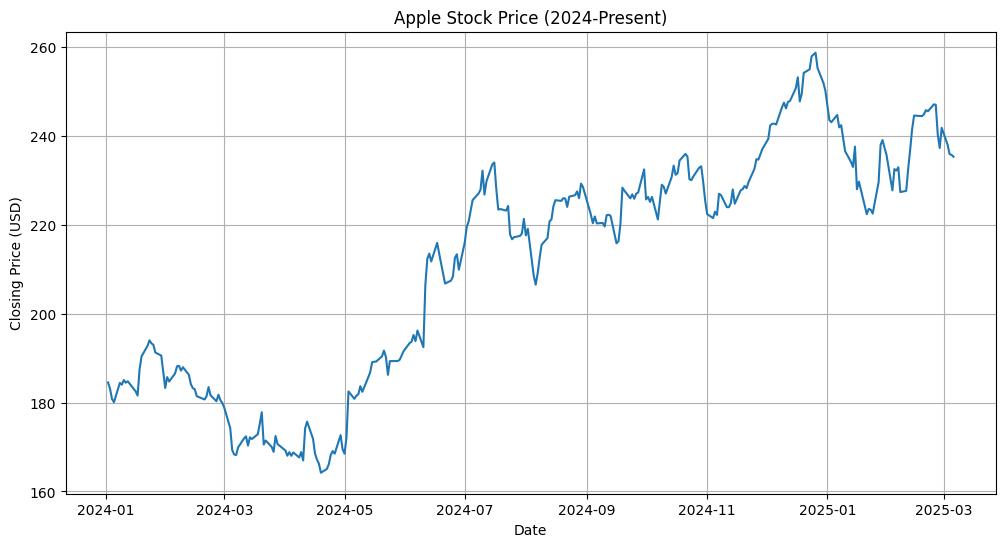

In [2]:
# Plot the closing price
plt.figure(figsize=(12, 6))
plt.plot(data['Close'])
plt.title('Apple Stock Price (2024-Present)')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.grid(True)
plt.show()

### CLASSICAL TIME SERIES DECOMPOSITION

- Assumes fixed seasonal patterns in the data
- Easily influenced by outliers
- Can handle both multiplicative and additive models

In [3]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition_additive = seasonal_decompose(data['Close'], model='additive', period=30) # THIS IS THE PERIOD WE WANT TO USE, 30 = DAILY
# decomposition_multiplicative = seasonal_decompose(data['Close'], model='multiplicative')

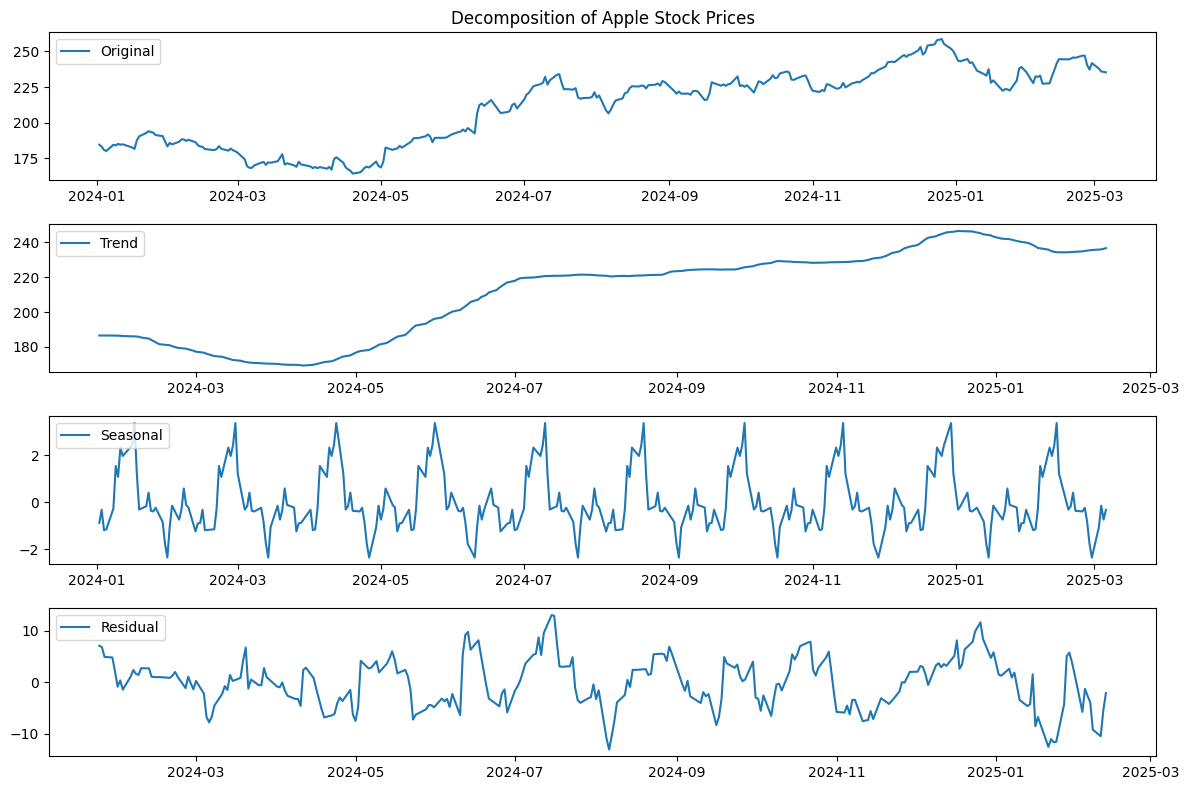

In [4]:
# Plot the original data
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(data['Close'], label='Original')
plt.legend(loc='upper left')
plt.title('Decomposition of Apple Stock Prices')

# Plot the trend component
plt.subplot(412)
plt.plot(decomposition_additive.trend, label='Trend')
plt.legend(loc='upper left')


# Plot the seasonal component
plt.subplot(413)
plt.plot(decomposition_additive.seasonal, label='Seasonal')
plt.legend(loc='upper left')

# Plot the residual component
plt.subplot(414)
plt.plot(decomposition_additive.resid, label='Residual')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


### STL DECOMPOSITION USING LOESS METHOD
- LOESS = Locally estimated scatterplot smoothing
- Can handle outliers
- Only handle additive TS Data
- Finds actual/variety of seasonal patterns

In [5]:
import numpy as np
from statsmodels.tsa.seasonal import STL

# STL Decomposition
stl = STL(data['Close'], period=30)
res = stl.fit()

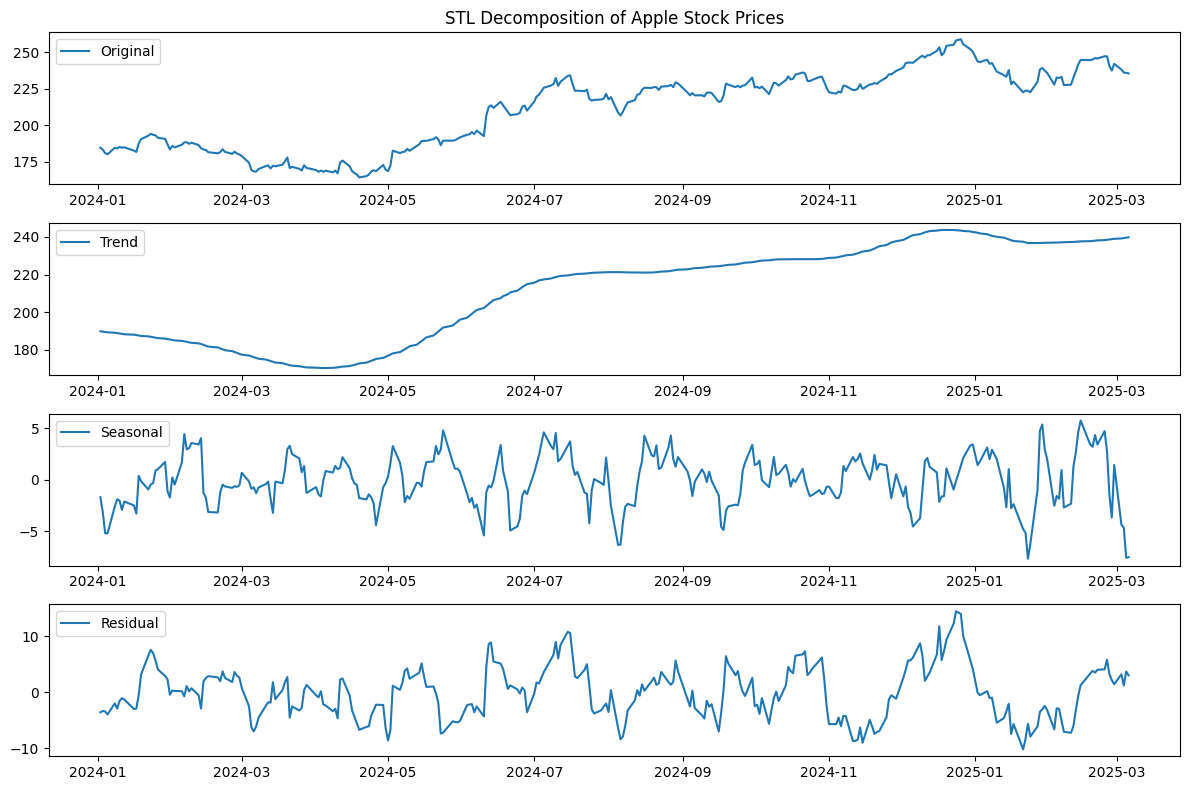

In [6]:
# Plot the STL decomposition
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(data['Close'], label='Original')
plt.legend(loc='upper left')
plt.title('STL Decomposition of Apple Stock Prices')

plt.subplot(412)
plt.plot(res.trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(res.seasonal, label='Seasonal')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(res.resid, label='Residual')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


### STATIONARITY

- mean, variance and autocorelation is constant over time
- autocorelation = corelation of a point at point t with point t-n where n is the lag
- Why do we need stationarity?
  - We are trying to predict statistical properties on future data which should be similar to the past data
- We need this for future forecasting, as we assume same properties throughout the time
- ARIMA/ SARIMA assume requires stationarity

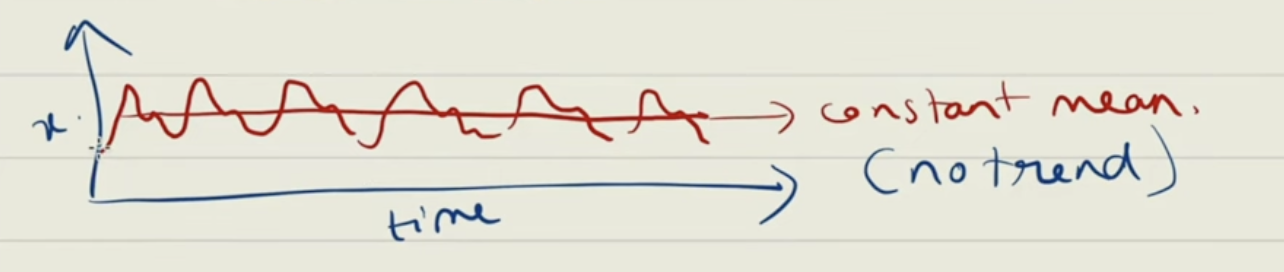

### TYPES OF STATIONARITY

- Weak Stationarity
  - Constant mean, variable and auto correlation

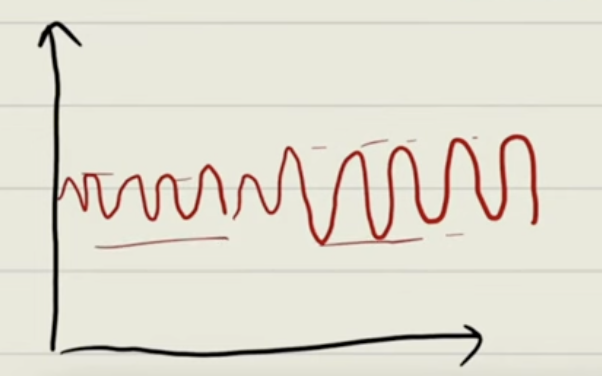

- Strict Stationarity
  - Properties of weak stationarity
  - Joint distribution remains unchanged when shifted along any time period IMPORTANT

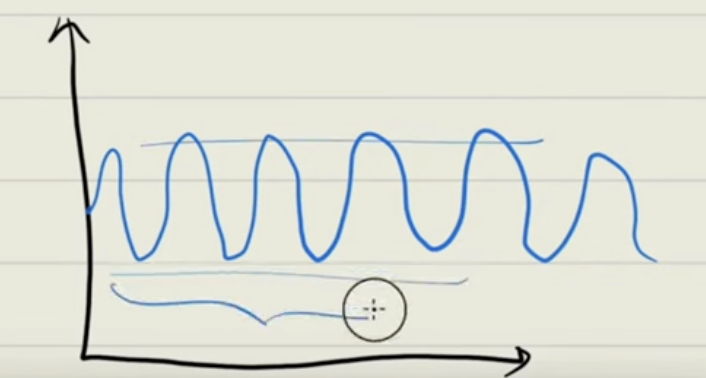

A time series model for which all joint distributions are invariant to shifts in time is called strictly stationary.

Formally, this means that for any collection of times (t1,t2,…,tK)
, the joint distribution of observations at these times should be the same as the joint distribution at (t1+τ,t2+τ,…,tK+τ)
 for any τ
.

For equally spaced observations, this becomes: for any collection of timepoints n1,…,nK
, and for any lag h
, the joint density function of (Yn1,Yn2,…,YnK)
 is the same as the joint density function of (Yn1+h,Yn2+h,…,YnK+h)
.

In our general notation for densities, this strict stationarity requirement can be written as
fYn1,Yn2,…,YnK(y1,y2,…,yK)=fYn1+h,Yn2+h,…,YnK+h(y1,y2,…,yK).

**Strict stationarity implies weak stationarity (check this)**. Note that we only defined weak stationarity for equally spaced observations.


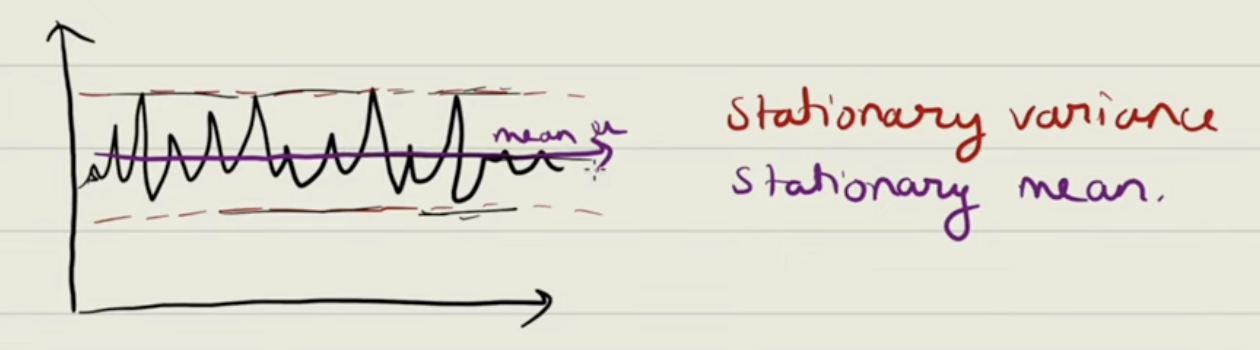

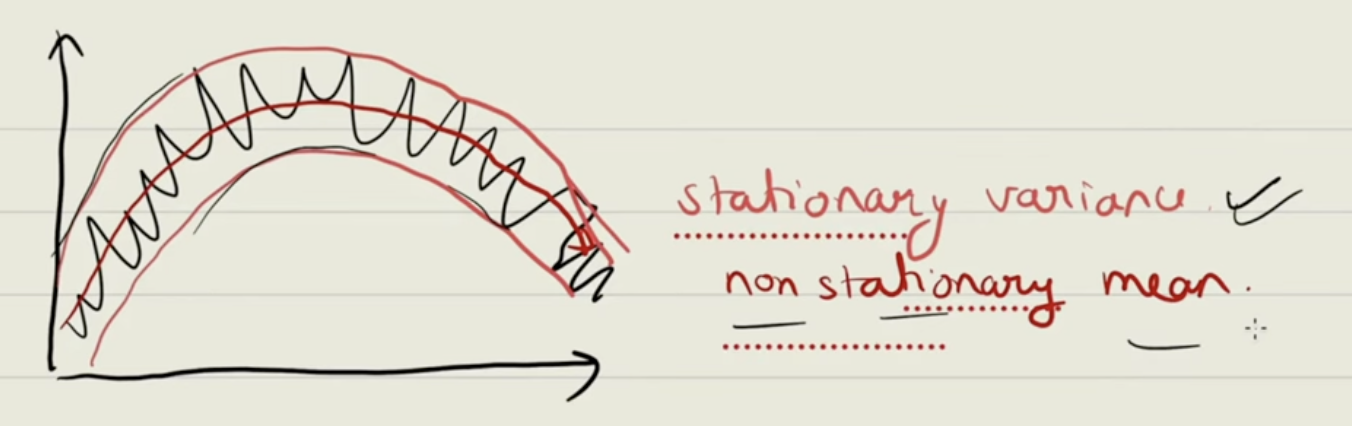

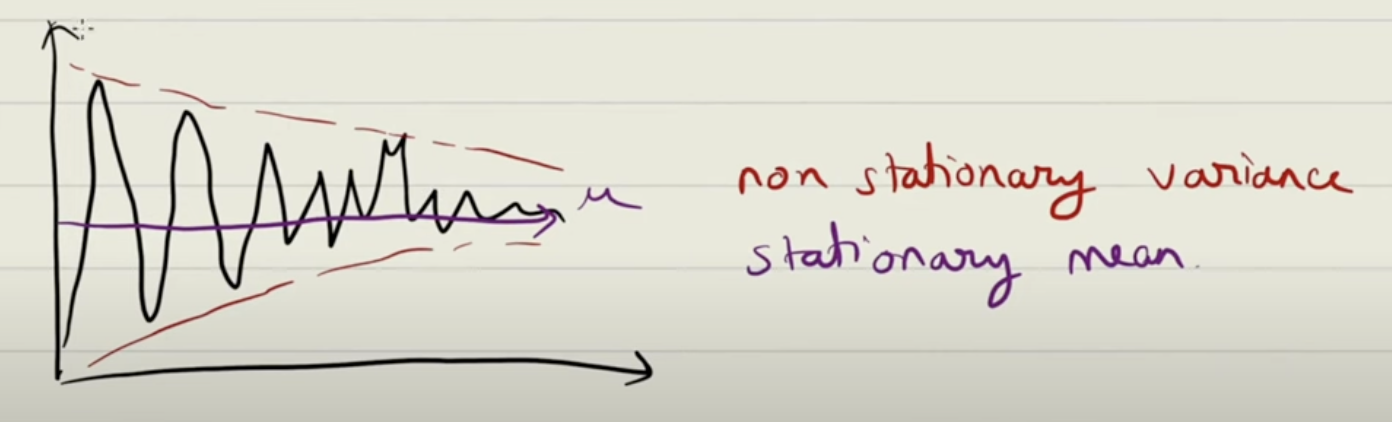

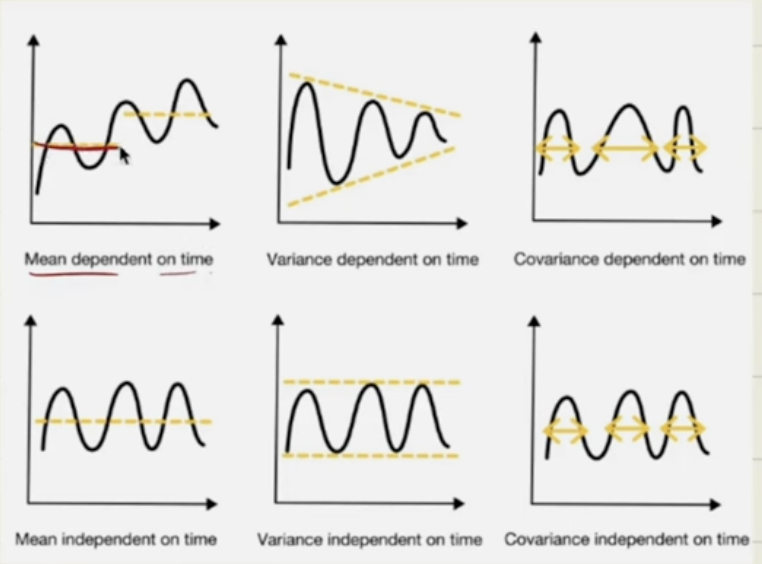

## FORECASTING MODELS AND TS MODELS:

- For forecasting shorter span: Weak Stationarity
- For Modeling longer distribution of data : Strict Stationary


### TESTING FOR STATIONARY
- Weak Stationary Test:
  - ADF Test:
    - If a unit root is present in the data
    - Unit Root: non stationary trend
      - Null hypothesis: Data has a unit root
      - Alternate hypothesis: Stationary Data
    - Decision Criteria: p-value< significance level (0.05) then data is stationary
    - ADF Statistic < Critical Value - Reject Null Value
  - KPSS Test:
    - Fit a constant mean model on the data
    - Measures the variance of cummulative sum of the variance
      - Null Hypothesis: Stationary
      - Alternate Hypothesis - Non Stationary
    - Decision Criteria: p-value < significance (0.05) non-stationary
    - KPSS Statistic > Critical Value then also non stationary


**Good to do both the tests to make sure we have weak stationarity**

- Strict Stationarity: Strict encompasses Weak stationarity
  - KS Test:
    - Compares the cummulative distribution functions of two samples
    - This test checks how similar two distributions are—whether a sample of data fits a specific distribution (like normal distribution) or if two samples are from the same distribution.
    - Decision Criteria: p > significance level 0.05 then there is no difference in distributions i.e., the data is strict stationary



In [7]:
from statsmodels.tsa.stattools import adfuller

try:
    # Perform the ADF test
    data = data['Close']
    result = adfuller(data)

    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if result[1] <= 0.05:
        print("The data is likely stationary (reject null hypothesis).")
    else:
        print("The data is likely non-stationary (fail to reject null hypothesis).")
except Exception as e:
    print(f"An error occurred: {e}")


ADF Statistic: -1.040177
p-value: 0.738330
Critical Values:
	1%: -3.453
	5%: -2.871
	10%: -2.572
The data is likely non-stationary (fail to reject null hypothesis).


In [8]:
from statsmodels.tsa.stattools import kpss

try:
    # Perform the KPSS test
    result = kpss(data)

    print('KPSS Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[3].items():
        print('\t%s: %.3f' % (key, value))

    if result[1] >= 0.05:
        print("The data is likely stationary (fail to reject null hypothesis).")
    else:
        print("The data is likely non-stationary (reject null hypothesis).")

except Exception as e:
    print(f"An error occurred: {e}")

KPSS Statistic: 2.387479
p-value: 0.010000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739
The data is likely non-stationary (reject null hypothesis).


<ipython-input-8-dd824c1b3aa6>:5: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(data)


In [9]:
from scipy.stats import ks_2samp, norm

series = data.values

def ks_test_stationary(series):
  split = len(series)/2
  series1 = series[:int(split)]
  series2 = series[int(split):]
  stat, p_value = ks_2samp(series1, series2)
  return stat, p_value

stat, p_value = ks_test_stationary(series)
alpha = 0.05

print('KS Statistic:', stat)

if p_value > alpha:
    print("The data are likely from the same distribution (fail to reject null hypothesis).")
else:
    print("The data are likely from different distributions (reject null hypothesis).")


KS Statistic: [0.83714837]
The data are likely from different distributions (reject null hypothesis).


### MAKING A TIME SERIES STATIONARY


1. Differencing (Current Value - Past Value)
  - First order Difference y(t') = y (at t) - y (at t-1)
  - Second Order Difference y(t'') = y' (at t) - y' (at t-1)
  - If we have seasonal data we can subtract with the lag that is same as the seasonal gap
2. Transforming : Stablize the variance of TS Data
  - Logrithmic: Log of Data
  - Power: Sqrt(yt)
  - Box-Cox: Combination of power and logrithmic transformation
3. De trending: Removing Trend Component
  - Linear Detrending: Subtracting a Regression value from the TS
  - Moving Average Detrending: Moving Average (MA) detrending is a technique used to remove trends from a time series by subtracting a moving average from the original data. We can have a window size and average values as per the sliding window size
4. Seasonal Adjustment:
  - Removing Seasonal Component: STL and Simple Decomposition



In [10]:
data = yf.download("AAPL", start="2024-01-01")

def adf_test(data, column_name='Close'):
    """
    Perform the Augmented Dickey-Fuller (ADF) test to check for stationarity.

    Parameters:
    - data (pd.DataFrame or pd.Series): The time series data.
    - column_name (str): The column name to analyze (if `data` is a DataFrame).

    Returns:
    - dict: A dictionary containing ADF statistic, p-value, and critical values.
    """
    try:
        # Extract the relevant column if data is a DataFrame
        if isinstance(data, pd.DataFrame):
            if column_name not in data.columns:
                raise ValueError(f"Column '{column_name}' not found in DataFrame.")
            data = data[column_name]

        # Perform the ADF test
        result = adfuller(data.dropna())  # Drop NaN values to avoid errors

        # Print results
        print(f'ADF Statistic: {result[0]:.6f}')
        print(f'p-value: {result[1]:.6f}')
        print('Critical Values:')
        for key, value in result[4].items():
            print(f'\t{key}: {value:.3f}')

        # Conclusion
        if result[1] <= 0.05:
            print("The data is likely stationary (reject null hypothesis).")
        else:
            print("The data is likely non-stationary (fail to reject null hypothesis).")

        # Return results as a dictionary
        return {
            'ADF Statistic': result[0],
            'p-value': result[1],
            'Critical Values': result[4],
            'Stationary': result[1] <= 0.05
        }

    except Exception as e:
        print(f"An error occurred: {e}")
        return None


def kpss_test(data, column_name='Close'):
    """
    Perform the KPSS test to check for stationarity.

    Parameters:
    - data (pd.DataFrame or pd.Series): The time series data.
    - column_name (str): The column name to analyze (if `data` is a DataFrame).

    Returns:
    - dict: A dictionary containing KPSS statistic, p-value, and critical values.
    """
    try:
        # Extract column if data is a DataFrame
        if isinstance(data, pd.DataFrame):
            if column_name not in data.columns:
                raise ValueError(f"Column '{column_name}' not found in DataFrame.")
            data = data[column_name]

        # Perform the KPSS test
        result = kpss(data.dropna(), regression='c', nlags="auto")  # 'c' tests for level stationarity

        # Print results
        print(f'KPSS Statistic: {result[0]:.6f}')
        print(f'p-value: {result[1]:.6f}')
        print('Critical Values:')
        for key, value in result[3].items():
            print(f'\t{key}: {value:.3f}')

        # Conclusion
        if result[1] >= 0.05:
            print("The data is likely stationary (fail to reject null hypothesis).")
        else:
            print("The data is likely non-stationary (reject null hypothesis).")

        # Return results as a dictionary
        return {
            'KPSS Statistic': result[0],
            'p-value': result[1],
            'Critical Values': result[3],
            'Stationary': result[1] >= 0.05  # Fail to reject null means stationary
        }

    except Exception as e:
        print(f"An error occurred: {e}")
        return None


def ks_test_stationary(data, column_name='Close'):
    """
    Perform the Kolmogorov-Smirnov (KS) test to check stationarity by splitting the series into two halves.

    Parameters:
    - data (pd.DataFrame or pd.Series): The time series data.
    - column_name (str): The column name to analyze (if `data` is a DataFrame).

    Returns:
    - dict: A dictionary containing KS statistic and p-value.
    """
    try:
        # Extract column if data is a DataFrame
        if isinstance(data, pd.DataFrame):
            if column_name not in data.columns:
                raise ValueError(f"Column '{column_name}' not found in DataFrame.")
            data = data[column_name]

        # Convert to numpy array
        series = data.dropna().values

        # Split into two halves
        split = len(series) // 2
        series1, series2 = series[:split], series[split:]

        # Perform KS test
        stat, p_value = ks_2samp(series1, series2)

        # Print results
        print(f'KS Statistic: {stat:.6f}')
        print(f'p-value: {p_value:.6f}')

        # Conclusion
        alpha = 0.05
        if p_value > alpha:
            print("The data are likely from the same distribution (fail to reject null hypothesis).")
        else:
            print("The data are likely from different distributions (reject null hypothesis).")

        # Return results as a dictionary
        return {
            'KS Statistic': stat,
            'p-value': p_value,
            'Same Distribution': p_value > alpha  # Fail to reject null means same distribution
        }

    except Exception as e:
        print(f"An error occurred: {e}")
        return None

[*********************100%***********************]  1 of 1 completed


In [11]:
# Simulated non-stationary time series data
time_series_data = data['Close']

# Run the ADF test
result = adf_test(time_series_data)

# Run KPSS test
kpss_result = kpss_test(time_series_data)

# Run KS test
ks_result = ks_test_stationary(time_series_data)

# Check stationarity results
if result and result['Stationary']:
    print("Time series is stationary.")
else:
    print("Time series is not stationary.")

if kpss_result and kpss_result['Stationary']:
    print("Time series is stationary based on KPSS test.")
else:
    print("Time series is not stationary based on KPSS test.")

if ks_result and ks_result['Same Distribution']:
    print("Time series is likely stationary based on KS test.")
else:
    print("Time series is likely non-stationary based on KS test.")

An error occurred: Column 'Close' not found in DataFrame.
An error occurred: Column 'Close' not found in DataFrame.
An error occurred: Column 'Close' not found in DataFrame.
Time series is not stationary.
Time series is not stationary based on KPSS test.
Time series is likely non-stationary based on KS test.


In [12]:
# DIFFERENCING
# #FIRST ORDER DIFFERENCING
fo_diff_data = data['Close'].diff()
fo_diff_data.columns = ['Close']

# #SECOND ORDER DIFFERENCING
so_diff_data = data['Close'].diff().diff()
so_diff_data.columns = ['Close']

In [13]:
result = adf_test(fo_diff_data)
result = adf_test(so_diff_data)

ADF Statistic: -16.142816
p-value: 0.000000
Critical Values:
	1%: -3.453
	5%: -2.871
	10%: -2.572
The data is likely stationary (reject null hypothesis).
ADF Statistic: -8.913083
p-value: 0.000000
Critical Values:
	1%: -3.454
	5%: -2.872
	10%: -2.572
The data is likely stationary (reject null hypothesis).


In [14]:
# DATA TRANSFORMING
from scipy import stats
price_log = np.log(data['Close'])
price_log.columns = ['Close']
price_sqrt = np.sqrt(data['Close'])
price_sqrt.columns = ['Close']

# Box Cox Requires all +ve values
price_boxcox, _ = stats.boxcox(data[data['Close']>0]['Close'].values.reshape(-1))

In [15]:
# Run the ADF test
result = adf_test(pd.DataFrame(price_boxcox,columns = ['Close']))
result = adf_test(price_log)
result = adf_test(price_sqrt)

ADF Statistic: -1.098492
p-value: 0.715673
Critical Values:
	1%: -3.453
	5%: -2.871
	10%: -2.572
The data is likely non-stationary (fail to reject null hypothesis).
ADF Statistic: -1.008996
p-value: 0.749969
Critical Values:
	1%: -3.453
	5%: -2.871
	10%: -2.572
The data is likely non-stationary (fail to reject null hypothesis).
ADF Statistic: -1.022726
p-value: 0.744885
Critical Values:
	1%: -3.453
	5%: -2.871
	10%: -2.572
The data is likely non-stationary (fail to reject null hypothesis).


#### CONCLUSION:
- Data was stationary after differencing, and not after data transformations, which means we have less variance in our data

### TREND DECOMPOSITION

In [16]:
from scipy import signal

# Ensure 'Close' is a Series
close_series = data['Close'].squeeze()  # Converts a single-column DataFrame to a Series if necessary

# Fit a linear trend, we can also fit a regression model to get the trend line
trend = np.polyfit(np.arange(len(close_series)), close_series, 1)
trendline = np.polyval(trend, np.arange(len(close_series)))

# Subtract trendline
detrended_data = close_series - trendline


detrended_data.columns = ['Close']
result = adf_test(detrended_data)

ADF Statistic: -2.161728
p-value: 0.220428
Critical Values:
	1%: -3.453
	5%: -2.871
	10%: -2.572
The data is likely non-stationary (fail to reject null hypothesis).


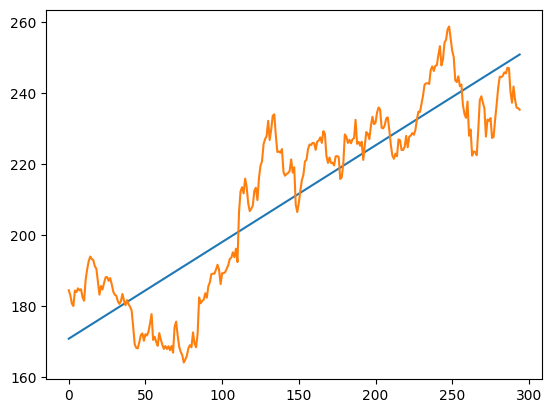

In [17]:
plt.plot(np.arange(len(close_series)),trendline)
plt.plot(np.arange(len(close_series)),close_series)
plt.show()

### MA DECOMPOSITION

In [18]:
window = 12
prices_ma = close_series.rolling(window=window).mean()
ma_detrended = close_series - prices_ma
ma_detrended.columns = ['Close']
result = adf_test(ma_detrended)

ADF Statistic: -4.768337
p-value: 0.000063
Critical Values:
	1%: -3.454
	5%: -2.872
	10%: -2.572
The data is likely stationary (reject null hypothesis).


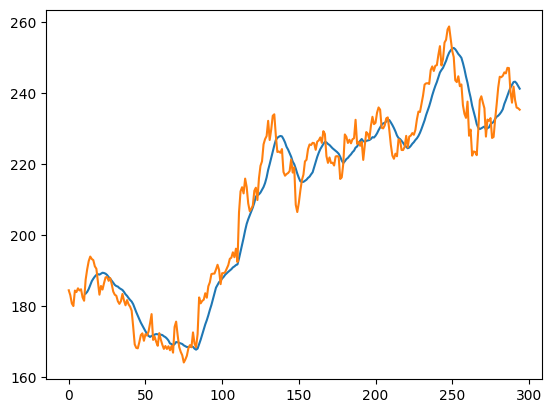

In [19]:
plt.plot(np.arange(len(close_series)),prices_ma)
plt.plot(np.arange(len(close_series)),close_series)
plt.show()

### SEASONAL DECOMPOSITION

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition_additive = seasonal_decompose(close_series, model='multiplicative', period=30)
price_adjusted = close_series / decomposition_additive.seasonal
price_adjusted = price_adjusted.dropna()
result = adf_test(price_adjusted)

ADF Statistic: -1.004943
p-value: 0.751457
Critical Values:
	1%: -3.453
	5%: -2.871
	10%: -2.572
The data is likely non-stationary (fail to reject null hypothesis).


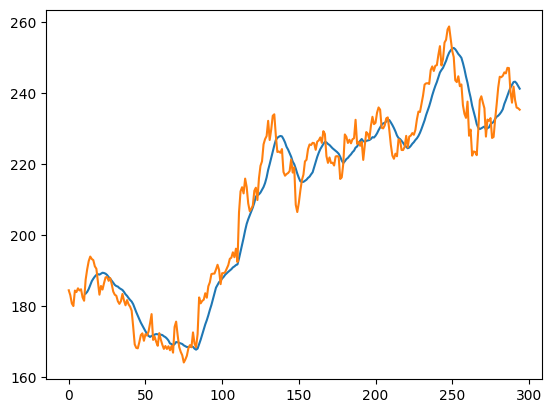

In [21]:
plt.plot(np.arange(len(close_series)),prices_ma)
plt.plot(np.arange(len(close_series)),close_series)
plt.show()

### WHITE NOISE
- TS Data with no pattern, trend, seasonality
- Constant mean, Constant variance, No Autocorrlation
- Completely random so you do not proceed with any analytics

### RANDOM WALK
- Cummulative pattern (You add past values to get the future value)
y(t) = y(t-1) + e
- This is predictible
- There is a auto correlation
- Mean and Variance Change over time
- This is a non stationary data
- First Difference is stationary
- no predictible Pattern



METHODS TO FIND IF THE DATA IS A WHITE NOISE OR RANDOM WALK
- Visual Representation
- ACF & PACF Plot
- Ljung Box Test

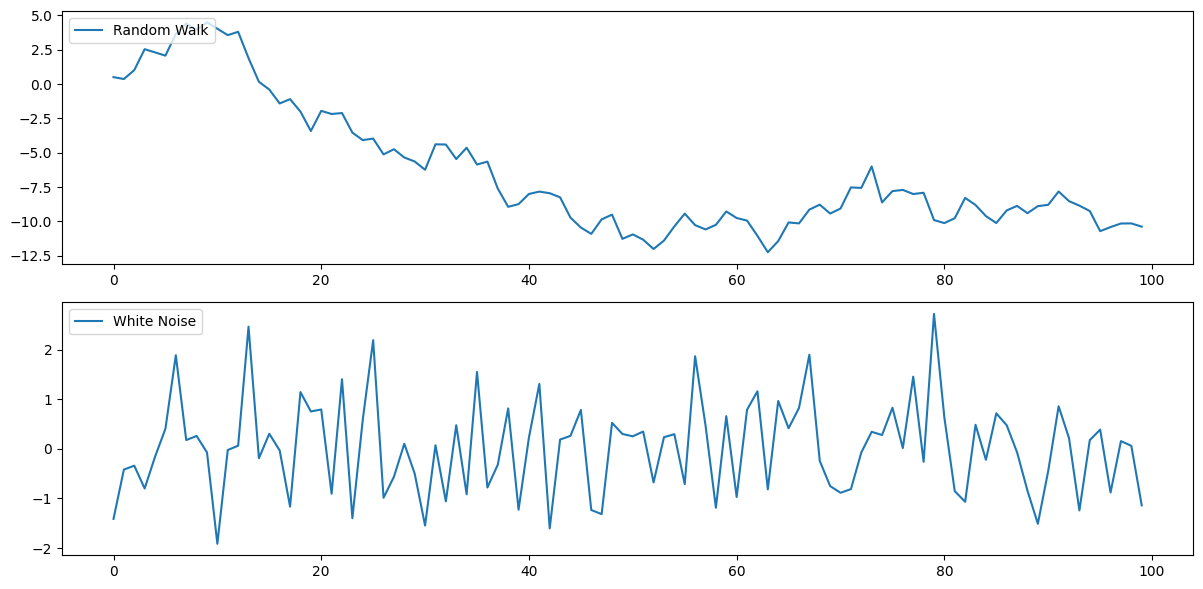

In [22]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate random walk data
n_points = 100
random_walk = np.cumsum(np.random.randn(n_points))  # Cumulative sum to create random walk

# Generate white noise data (independent and identically distributed random numbers)
white_noise = np.random.randn(n_points)

# Create a DataFrame for visualization
data = pd.DataFrame({
    'Random Walk': random_walk,
    'White Noise': white_noise
})

# Random Walk Plot
plt.figure(figsize=(12, 6))
plt.subplot(211)
plt.plot(data['Random Walk'], label='Random Walk')
plt.legend(loc='upper left')

# White Noise Plot
plt.subplot(212)
plt.plot(data['White Noise'], label='White Noise')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()



In [23]:
from statsmodels.stats.diagnostic import acorr_ljungbox

# Perform Ljung-Box test (default lags = 10)
ljung_box_results = acorr_ljungbox(close_series, lags=[10], return_df=True)

# Display results
print(ljung_box_results)


if ljung_box_results.lb_pvalue.values[0] < 0.05:
    print("The data is likely a random walk.")
else:
    print("The data is likely white noise.")

        lb_stat  lb_pvalue
10  2671.984852        0.0
The data is likely a random walk.


### TIME SERIES FORECASTING MODELS
- All the models assume the data is stationary

#### UNIVARIATE

- AUTO REGRESSIVE (AR)
  - Uses past values to predict future (similar to regression)
  - We have to decide the order (number of past terms used to calcualte the future), this is donated by p
  - AR(p), p lagged observations
  - AR(p) = y(t) = c + ρ1 * y(t-1) + ρ2 * y(t-2) + ..... ρ3 * y(t-p) + e(t)
  - c is the constant term, ρ is the parameter, e = white noise

- MOVING AVERAGE (MA)
   - It uses the past error terms (residuals)
   - Order of moving average model is q, q = # of lag error terms
   - 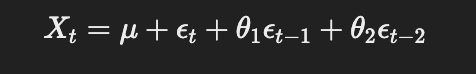
   - 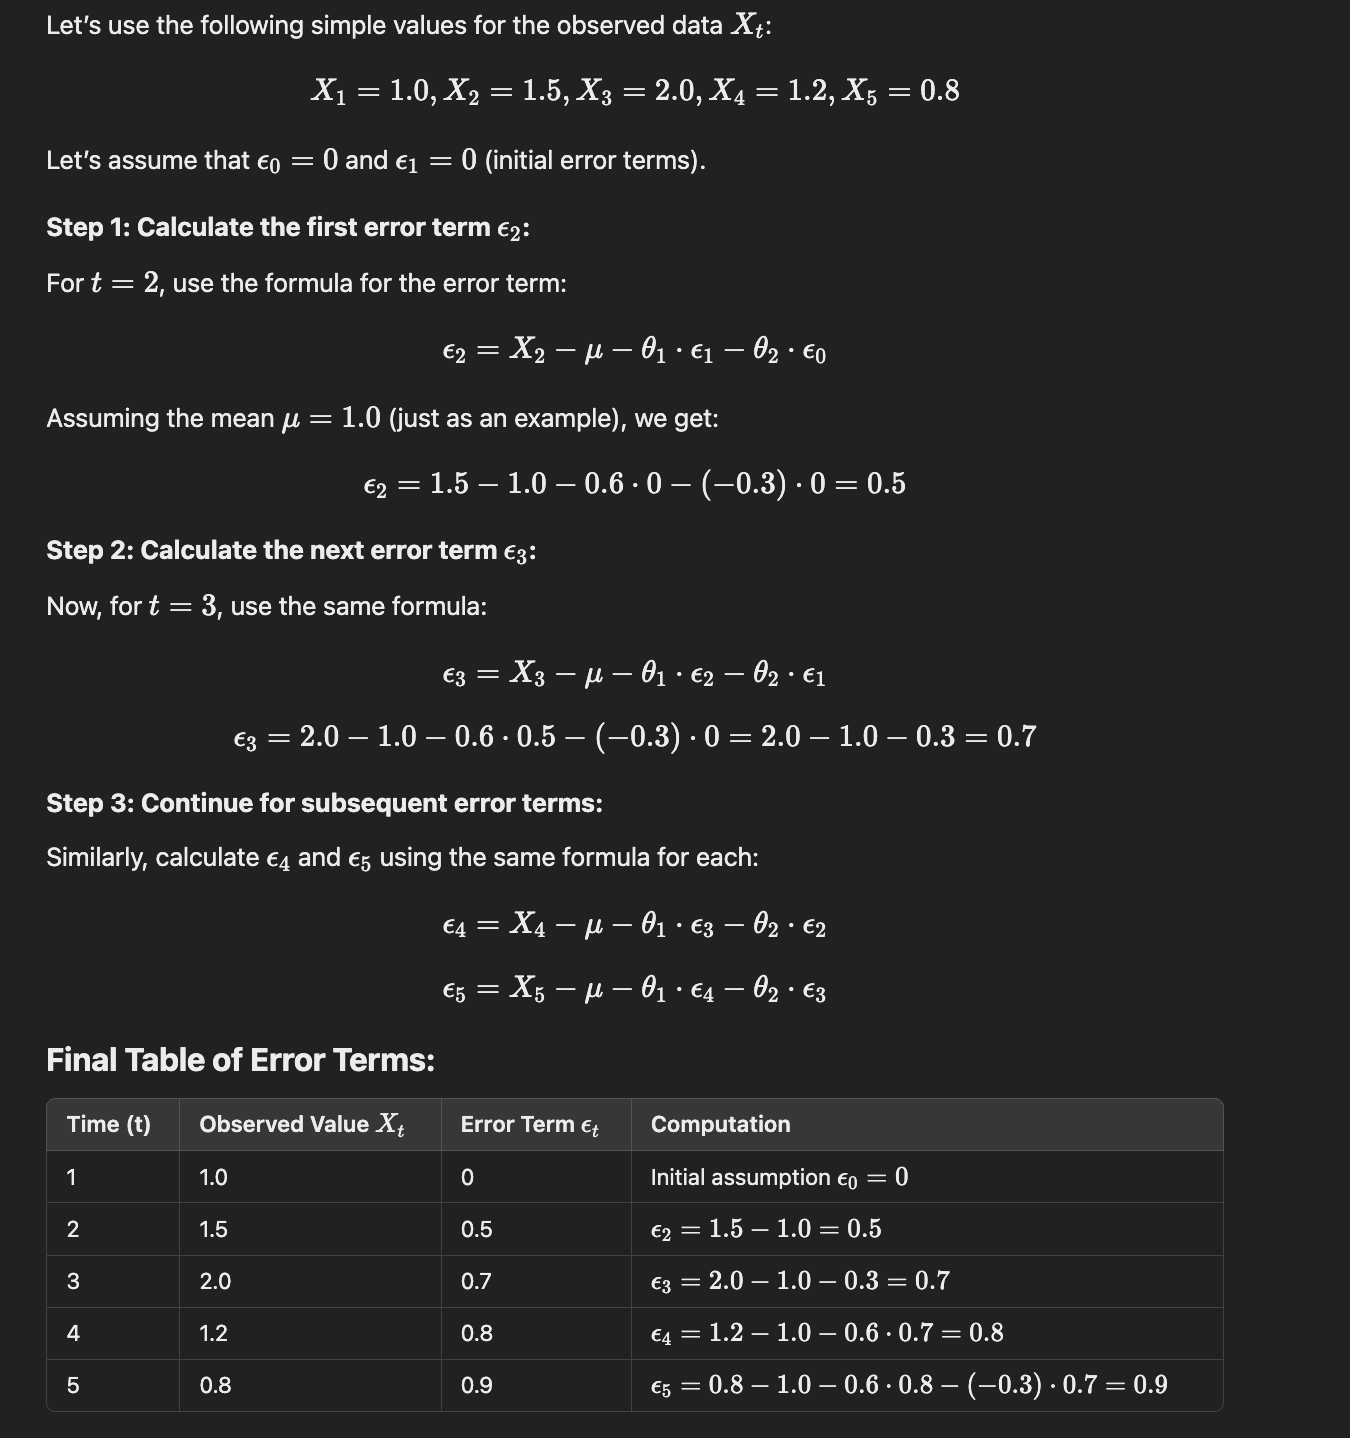

- AUTO REGRESSIVE MOVING AVERAGE (ARMA)
  - Combines the AR and ML Model
  - Captures both temporal dependencies and error terms
  - order (p,q)
  - 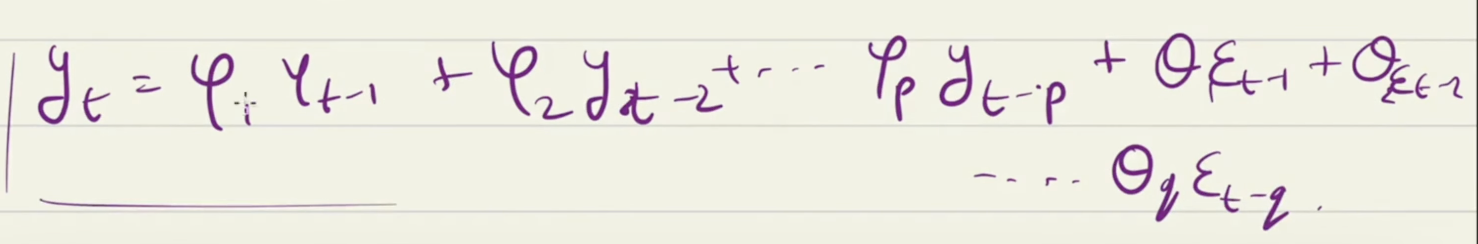
- AUTOREGRESSIVE INTEGRATED MOVING AVERAGE (ARIMA)
  - I part involves differencing
    - 1st, 2nd, 3rd order difference, we do not go more than 3 as the data loses almost all the signal
    - ARIMA (p,d,q)
    - 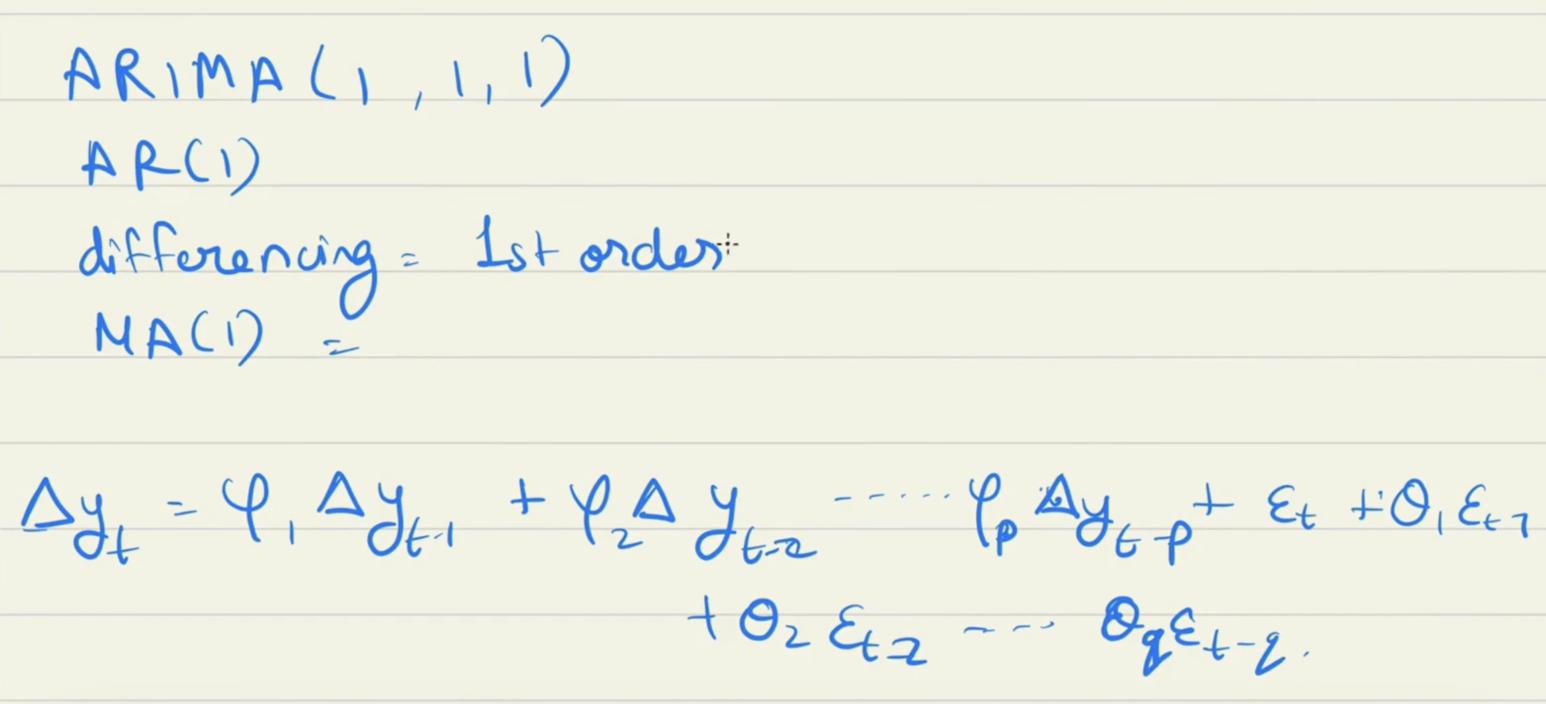
- SEASONAL AUTOREGRESSIVE INTEGRATED MOVING AVERAGE (SARIMA)
   - Seasonal ARIMA Model
   - 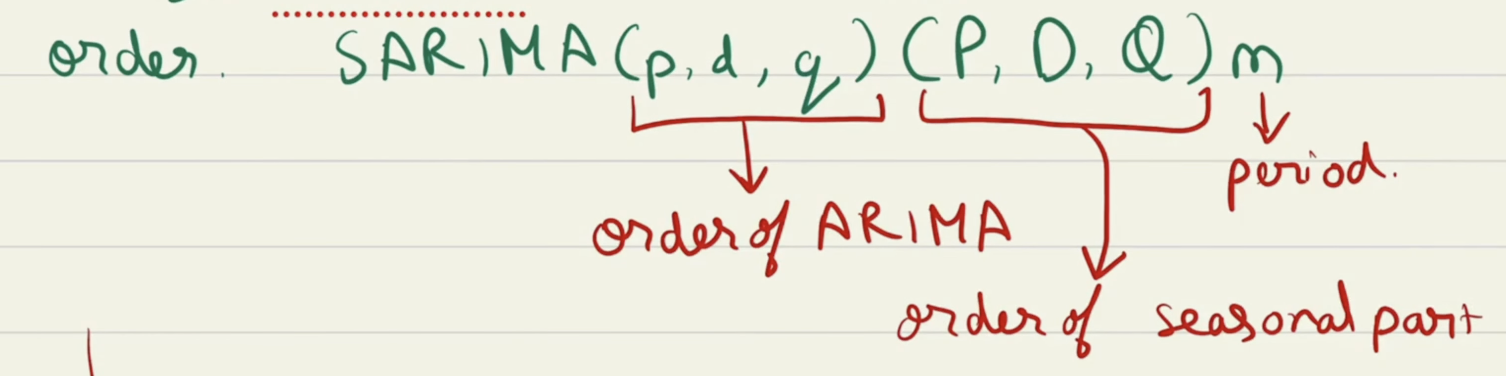
   - for yearly m=3 if data is quarterly, for 3 years m=3 if data is yearly



#### MULTIVARIATE
- This is not just one variable but we have other points which influence the target variable
- These use multiple time series and theor dependencies on each other to predict the final outcome/future values

- VECTOR AUTO REGRESSIVE (VAR)
- VECTOR MOVING AVERAGE (VMA)
- VECTOR AUTOREGRESSIVE MOVING AVERAGE (VARMA)
- VECTOR AUTOREGRESSIVE INTEGRATED MOVING AVERAGE (VARIMA)


Equations are complex - refer text online


GRANGER CAUSALITY TEST:
- If X causes Y or no (One TS can predict another TS)
- This is not correlation

### AR MODEL

In [24]:
data = yf.download("AAPL", start="2024-01-01")

close_prices = data['Close'].dropna()

[*********************100%***********************]  1 of 1 completed


In [25]:
adf_result = adfuller(close_prices)
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")

if adf_result[1] > 0.05:
    print("The series is likely non-stationary. Differencing it.")
    close_prices = close_prices.diff().dropna()

adf_result = adfuller(close_prices)
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")

if adf_result[1] > 0.05:
    print("The series is likely non-stationary. Differencing it.")
    close_prices = close_prices.diff().dropna()
else:
    print("Stationary")

ADF Statistic: -1.040176616845535
p-value: 0.738330326988484
The series is likely non-stationary. Differencing it.
ADF Statistic: -16.142818572064797
p-value: 4.656583652462139e-29
Stationary


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Mean Squared Error (MSE): 13.9955


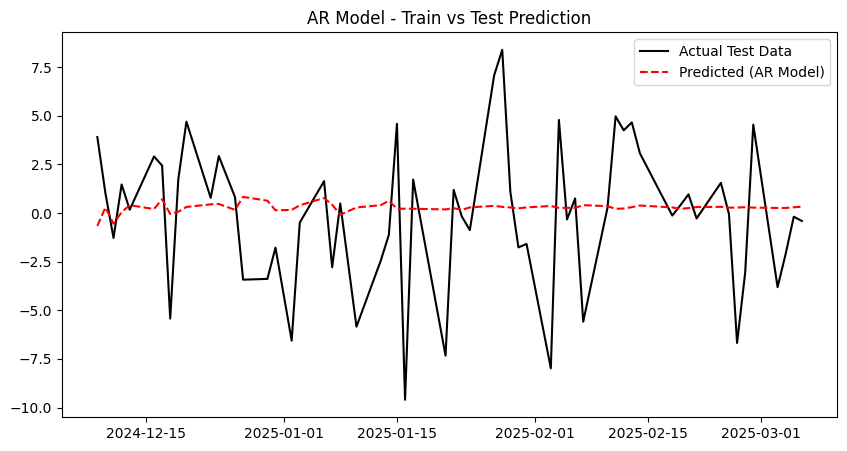

In [26]:
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error

train_data, test_data = close_prices[:int(0.8 * len(close_prices))], close_prices[int(0.8 * len(close_prices)):]

lags = 30  # You can optimize this
ar_model = AutoReg(train_data, lags=lags).fit()

predictions = ar_model.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1)

mse = mean_squared_error(test_data, predictions)
print(f"Mean Squared Error (MSE): {mse:.4f}")

# Step 8: Plot Actual vs Predicted Values
plt.figure(figsize=(10, 5))
# plt.plot(train_data, label="Training Data")
plt.plot(test_data, label="Actual Test Data", color='black')
plt.plot(test_data.index, predictions, label="Predicted (AR Model)", linestyle="dashed", color='red')
plt.legend()
plt.title("AR Model - Train vs Test Prediction")
plt.show()

### MA MODEL

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/di

Mean Squared Error (MSE): 14.3658


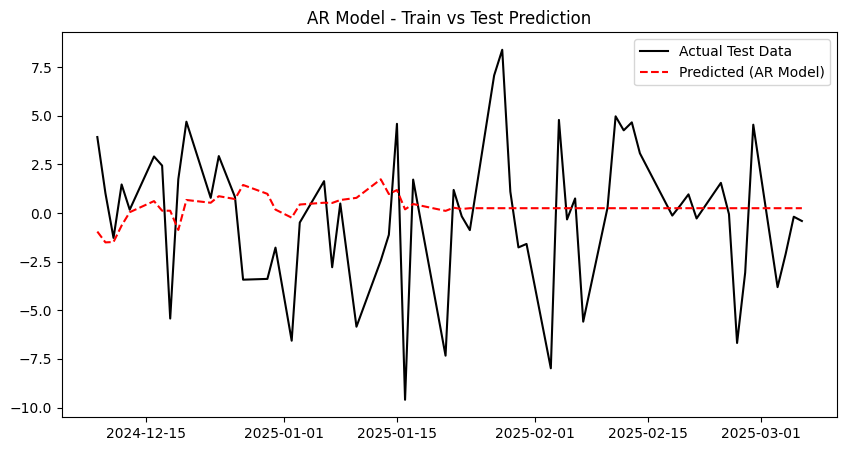

In [30]:
from statsmodels.tsa.arima.model import ARIMA

order = (0,0,30)  # You can optimize this
model = ARIMA(train_data, order=order).fit()

predictions = model.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1)

mse = mean_squared_error(test_data, predictions)
print(f"Mean Squared Error (MSE): {mse:.4f}")

# Step 8: Plot Actual vs Predicted Values
plt.figure(figsize=(10, 5))
# plt.plot(train_data, label="Training Data")
plt.plot(test_data, label="Actual Test Data", color='black')
plt.plot(test_data.index, predictions, label="Predicted (AR Model)", linestyle="dashed", color='red')
plt.legend()
plt.title("AR Model - Train vs Test Prediction")
plt.show()